In [140]:
import utils
from importlib import reload
reload(utils)
import pandas as pd

%matplotlib inline

In [146]:
DATA_PATH = 'data_downloader/fundamental'
data_files = utils.DataLoader.from_directory(DATA_PATH)

raw_df = data_files.df[:]

In [147]:
df = utils.rename_columns(raw_df)
df = utils.format_columns(df)

[could not convert string to float: 'NM']   Function:float    Args:NM
[could not convert string to float: 'NM']   Function:float    Args:NM
[could not convert string to float: 'NM']   Function:float    Args:NM
[could not convert string to float: 'NM']   Function:float    Args:NM
[could not convert string to float: 'NM']   Function:float    Args:NM
[could not convert string to float: 'NM']   Function:float    Args:NM
[could not convert string to float: 'NM']   Function:float    Args:NM
[could not convert string to float: 'NM']   Function:float    Args:NM
[could not convert string to float: 'NM']   Function:float    Args:NM
[could not convert string to float: 'NM']   Function:float    Args:NM
[could not convert string to float: 'NM']   Function:float    Args:NM
[could not convert string to float: 'NM']   Function:float    Args:NM
[could not convert string to float: 'NM']   Function:float    Args:NM
[could not convert string to float: 'NM']   Function:float    Args:NM
[could not convert s

In [148]:
df[df['pe_ratio'].isnull()]

,earnings_growth_next_5_yr,market_cap,earnings_growth_last_yr,price_book,industry,net_profit_margin,price_sales,pe_ratio,annual_revenue,todays_open,average_volume,sector,revenue_growth,previous_close,annual_profit,volume,earnings_growth_this_yr,dividend_yield,days_range
SPLS,16.00,6.700000e+09,-461.19,1.81,Specialty Stores,-2.52,0.33,NaN,1.820000e+10,10.22,9791861,Retail Trade,-13.35,10.22,-1.400000e+09,4962139,-3.92,4.70,10.21 - 10.23
NBL,3.71,1.180000e+10,61.78,1.13,Oil & Gas Production,-29.45,4.83,NaN,3.400000e+09,23.78,5911811,Energy Minerals,11.37,23.77,-9.980000e+08,3846925,71.63,1.65,23.59 - 24.36
NLSN,10.00,1.410000e+10,-9.54,3.44,Advertising/Marketing Services,7.96,2.41,NaN,6.300000e+09,38.92,3008533,Commercial Services,2.22,38.85,5.020000e+08,2346385,-5.29,3.44,38.81 - 39.52
AVGO,15.17,1.014000e+11,-193.30,5.33,Semiconductors,-12.33,4.9,NaN,1.320000e+10,252.33,2680007,Electronic Technology,94.02,252.07,-1.800000e+09,2324233,38.98,1.61,252.30 - 255.34
COG,31.94,1.240000e+10,-225.00,4.87,Oil & Gas Production,-34.92,8.93,NaN,1.200000e+09,25.55,6028351,Energy Minerals,-8.14,25.55,-4.171000e+08,10050893,392.98,0.74,25.55 - 26.95
NWS,14.47,2.800000e+09,-523.33,0.74,Publishing: Newspapers,-9.07,1.01,NaN,8.100000e+09,13.7,419291,Consumer Services,-6.95,13.7,-7.380000e+08,596726,29.22,1.45,13.70 - 13.85
COP,6.00,5.380000e+10,18.59,1.57,Oil & Gas Production,-15.13,2.61,NaN,2.390000e+10,43.76,7636043,Energy Minerals,-18.55,43.66,-3.600000e+09,4808804,107.58,2.40,43.48 - 44.39
RL,NaN,7.300000e+09,-126.03,2.19,Apparel/Footwear Retail,-1.49,1.01,NaN,6.700000e+09,87.96,1583417,Retail Trade,-10.16,87.89,-9.930000e+07,1188667,-7.47,2.24,87.71 - 89.42
FTI,-1.94,1.230000e+10,NaN,--,Oilfield Services/Equipment,NaN,--,NaN,0.000000e+00,26.04,3355269,Industrial Services,NaN,25.83,-1.190000e+04,2554038,-18.23,NaN,25.80 - 26.36
BHGE,33.00,3.930000e+10,-40.53,1.15,Oilfield Services/Equipment,-27.82,2.87,NaN,9.800000e+09,33.97,3109836,Industrial Services,-37.49,33.9,-2.700000e+09,1724403,125.88,1.98,33.73 - 34.44


# Basic indexing

# Q: How do you get all the data for pe?

Access a column of data

In [149]:
df['pe_ratio'].head(10)

WYNN    53.7
CI      21.1
ABC     20.9
AET     35.1
ALLE    30.6
FITB    13.4
A       36.2
IVZ     14.8
KR      13.5
NAVI     7.3
Name: pe_ratio, dtype: float64

# Q: What is the last price for each symbol?

In [150]:
price = df.days_range.apply(lambda x: float(x.split('-')[0].replace(',', '')))
price.head(10)

WYNN    140.85
CI      182.23
ABC      79.22
AET     156.79
ALLE     78.85
FITB     26.12
A        64.21
IVZ      32.88
KR       21.94
NAVI     13.25
Name: days_range, dtype: float64

# Q: How do you read and reformat the data?

In [164]:
df1 = pd.read_csv('data_downloader/sp500.csv', 
                  usecols=['Symbol', 'YTDchange', 'Company'], 
                  converters={'YTDchange': utils.plus_minus_percent},
                 )
df1 = df1.rename(columns={'YTDchange': 'ytd_change', 'Company': 'company_name'})
df1

,company_name,ytd_change,Symbol
0,3M,15.35,MMM
1,A. O. Smith Corp,13.37,AOS
2,Abbott Laboratories,26.37,ABT
3,AbbVie,12.79,ABBV
4,Accenture,9.45,ACN
5,Activision Blizzard Inc,68.21,ATVI
6,Acuity Brands Inc,-19.57,AYI
7,Adobe,42.27,ADBE
8,Advance Auto Parts Inc,-36.53,AAP
9,Advanced Micro Devices Inc,7.85,AMD


In [165]:
df = df.merge(df1, left_index=True, right_on='Symbol').set_index('Symbol')
df

,earnings_growth_next_5_yr,market_cap,earnings_growth_last_yr,price_book,industry,net_profit_margin,price_sales,pe_ratio,annual_revenue,todays_open,...,revenue_growth,previous_close,annual_profit,volume,earnings_growth_this_yr,dividend_yield,days_range,ytd_change_x,company_name,ytd_change_y
Symbol,,,,,,,,,,,,,,,,,,,,,
WYNN,3.00,1.470000e+10,23.96,92.44,Casinos/Gaming,5.42,1.97,53.7,4.500000e+09,141.4,...,9.58,138.99,2.420000e+08,3014094,44.66,1.39,140.85 - 144.81,45.22,Wynn Resorts,45.22
CI,13.20,4.610000e+10,-10.57,3.43,Managed Health Care,4.70,0.87,21.1,3.970000e+10,182.68,...,4.51,182.06,1.900000e+09,1018727,23.37,0.02,182.23 - 184.23,30.73,Cigna Corp,30.73
ABC,8.00,1.760000e+10,NaN,8.29,Medical Distributors,0.97,0.12,20.9,1.468000e+11,80.46,...,8.01,80.25,1.400000e+09,1248437,4.66,1.82,79.22 - 80.61,2.34,AmerisourceBergen Corp,2.34
AET,11.00,5.250000e+10,-5.46,3.11,Managed Health Care,3.59,0.7,35.1,6.320000e+10,157.78,...,4.61,157.7,2.300000e+09,1140964,14.33,1.26,156.79 - 159.00,22.69,Aetna,22.69
ALLE,12.53,7.500000e+09,49.38,66.56,Building Products,10.24,2.77,30.6,2.200000e+09,79.03,...,8.22,78.71,2.291000e+08,517796,13.07,0.81,78.85 - 79.40,23.88,Allegion PLC,23.88
FITB,6.40,1.950000e+10,-3.98,1.33,Regional Banks,24.28,3.23,13.4,6.400000e+09,26.18,...,-0.93,26.13,1.500000e+09,3405057,-5.19,2.12,26.12 - 26.61,-3.19,Fifth Third Bancorp,-3.19
A,11.79,2.070000e+10,16.67,4.92,Biotechnology,10.99,3.41,36.2,4.200000e+09,64.9,...,4.06,64.72,4.620000e+08,1224667,16.75,0.82,64.21 - 65.18,30.22,Agilent Technologies Inc,30.22
IVZ,13.96,1.350000e+10,-8.85,1.78,Investment Managers,17.44,2.57,14.8,4.800000e+09,32.95,...,-5.94,32.78,8.294000e+08,1832880,13.82,3.50,32.88 - 33.30,12.03,Invesco Ltd,12.03
KR,6.05,2.010000e+10,-0.73,3.09,Food Retail,1.70,0.28,13.5,1.153000e+11,21.97,...,5.01,21.87,2.000000e+09,13862536,-6.75,2.23,21.94 - 22.54,-31.93,Kroger Co,-31.93


# Q: How do you get all data for Apple (e.g. a symbol)?


In [166]:
df.loc['AAPL'] 

earnings_growth_next_5_yr                            13.5
market_cap                                      8.474e+11
earnings_growth_last_yr                             -9.87
price_book                                           6.83
industry                     Telecommunications Equipment
net_profit_margin                                   21.33
price_sales                                          2.89
pe_ratio                                             18.6
annual_revenue                                  2.142e+11
todays_open                                         164.8
average_volume                                   27395832
sector                              Electronic Technology
revenue_growth                                      -7.37
previous_close                                        164
annual_profit                                    4.57e+10
volume                                           16591051
earnings_growth_this_yr                              8.41
dividend_yield

# Q: How do you access data for the 50th symbol? (e.g. nth item)

In [167]:
df.iloc[50]

earnings_growth_next_5_yr                                   6.09
market_cap                                              1.14e+10
earnings_growth_last_yr                                  -221.63
price_book                                                  2.27
industry                           Real Estate Investment Trusts
net_profit_margin                                         -14.39
price_sales                                                 9.29
pe_ratio                                                   275.7
annual_revenue                                         9.107e+08
todays_open                                               121.37
average_volume                                            610336
sector                                                   Finance
revenue_growth                                              9.11
previous_close                                            121.31
annual_profit                                          -1.31e+08
volume                   

# Q: How do you get all earnings data for GOOG, MSFT, AAPL?

In [168]:
columns = [c for c in df.columns if c.startswith('earnings')]
symbols = ['GOOG', 'MSFT', 'AAPL']
df.loc[symbols, columns]

,earnings_growth_next_5_yr,earnings_growth_last_yr,earnings_growth_this_yr
Symbol,,,
GOOG,19.14,22.06,-11.94
MSFT,10.00,29.05,-2.72
AAPL,13.50,-9.87,8.41


# Missing Data

# Q: Find which columns have missing data

In [169]:
_d = df.isnull().sum()
_d[_d > 0]

earnings_growth_next_5_yr     4
market_cap                    3
earnings_growth_last_yr      20
net_profit_margin             4
pe_ratio                     42
annual_revenue                3
revenue_growth                6
annual_profit                 3
earnings_growth_this_yr      10
dividend_yield               82
ytd_change_x                  2
ytd_change_y                  2
dtype: int64

# Q: What is the average market cap?

In [170]:
df.market_cap.mean() / 1e9 # in billions

43.873293172690765

# Q: How many companies are above / below?

In [171]:
m = df.market_cap > df.market_cap.mean()
m.value_counts()

False    384
True     117
Name: market_cap, dtype: int64

# Q: What is the market cap where 50% are below and 50% are above? (aka median)

In [172]:
df.market_cap.describe()

count    4.980000e+02
mean     4.387329e+10
std      7.399241e+10
min      2.800000e+09
25%      1.140000e+10
50%      2.085000e+10
75%      3.985000e+10
max      8.474000e+11
Name: market_cap, dtype: float64

# Basic counting

In [173]:
df.iloc[0]

earnings_growth_next_5_yr                    3
market_cap                            1.47e+10
earnings_growth_last_yr                  23.96
price_book                               92.44
industry                        Casinos/Gaming
net_profit_margin                         5.42
price_sales                               1.97
pe_ratio                                  53.7
annual_revenue                         4.5e+09
todays_open                              141.4
average_volume                         2046500
sector                       Consumer Services
revenue_growth                            9.58
previous_close                          138.99
annual_profit                         2.42e+08
volume                                 3014094
earnings_growth_this_yr                  44.66
dividend_yield                            1.39
days_range                     140.85 - 144.81
ytd_change_x                             45.22
company_name                      Wynn Resorts
ytd_change_y 

# How many sectors are there?

In [174]:
df.sector.value_counts()

Finance                   98
Health Technology         41
Electronic Technology     41
Consumer Non-Durables     35
Consumer Services         33
Retail Trade              32
Producer Manufacturing    30
Technology Services       30
Utilities                 28
Energy Minerals           23
Process Industries        19
Consumer Durables         17
Transportation            14
Health Services           14
Industrial Services       13
Commercial Services       11
Distribution Services      9
Non-Energy Minerals        6
Communications             4
--                         3
Name: sector, dtype: int64

In [175]:
df.industry.value_counts()

Real Estate Investment Trusts       30
Electric Utilities                  25
Medical Specialties                 21
Oil & Gas Production                18
Semiconductors                      11
Investment Banks/Brokers            11
Packaged Software                   11
Biotechnology                       10
Aerospace & Defense                 10
Major Banks                          9
Specialty Stores                     9
Apparel/Footwear Retail              9
Data Processing Services             9
Industrial Conglomerates             8
Household/Personal Care              8
Regional Banks                       8
Movies/Entertainment                 7
Property/Casualty Insurance          7
Other Consumer Services              6
Food: Major Diversified              6
Pharmaceuticals: Major               6
Life/Health Insurance                6
Investment Managers                  6
Containers/Packaging                 6
Managed Health Care                  6
Apparel/Footwear         

In [176]:
df[df.industry == 'Major Banks']

,earnings_growth_next_5_yr,market_cap,earnings_growth_last_yr,price_book,industry,net_profit_margin,price_sales,pe_ratio,annual_revenue,todays_open,...,revenue_growth,previous_close,annual_profit,volume,earnings_growth_this_yr,dividend_yield,days_range,ytd_change_x,company_name,ytd_change_y
Symbol,,,,,,,,,,,,,,,,,,,,,
BAC,10.02,2.542000e+11,14.50,1,Major Banks,19.22,2.62,14.3,9.310000e+10,23.9,...,1.15,23.89,1.790000e+10,56233871,20.71,1.99,23.80 - 24.18,7.96,Bank of America,7.96
PNC,11.14,6.070000e+10,-1.11,1.34,Major Banks,23.83,3.59,16.1,1.630000e+10,125.83,...,3.92,125.41,3.900000e+09,1582546,14.83,2.37,125.11 - 127.19,9.48,PNC Financial Services Group,9.48
KEY,9.62,1.890000e+10,-23.81,1.38,Major Banks,14.82,3.22,17.5,5.300000e+09,17.27,...,19.87,17.21,7.910000e+08,7521447,23.87,2.19,17.19 - 17.47,-4.11,KeyCorp,-4.11
BK,10.90,5.410000e+10,16.24,1.55,Major Banks,22.38,3.25,15.5,1.560000e+10,52.45,...,1.21,52.28,3.500000e+09,2844794,11.44,1.83,52.23 - 52.69,10.15,Bank of New York,10.15
USB,7.23,8.640000e+10,2.53,2.1,Major Banks,26.29,3.97,15.6,2.230000e+10,51.38,...,8.65,51.25,5.900000e+09,3656465,6.11,2.17,51.24 - 51.95,1.32,U.S. Bancorp,1.32
BBT,9.14,3.740000e+10,8.42,1.4,Major Banks,21.21,3.35,17.3,1.140000e+10,46.04,...,11.43,46.09,2.400000e+09,3076398,1.82,2.85,46.03 - 46.52,-1.51,BB&T Corp,-1.51
CMA,21.42,1.220000e+10,-6.08,1.56,Major Banks,16.10,4.1,17.3,2.900000e+09,68.47,...,4.26,68.25,4.730000e+08,1720131,71.16,1.73,68.33 - 69.76,3.08,Comerica Inc,3.08
WFC,11.08,2.530000e+11,-3.16,1.46,Major Banks,22.94,2.94,12.6,9.560000e+10,51.06,...,5.37,51.07,2.190000e+10,16217688,4.51,3.06,50.93 - 51.49,-5.75,Wells Fargo,-5.75
RF,11.90,1.700000e+10,16.00,1.16,Major Banks,19.74,3.09,15.0,5.900000e+09,14.13,...,6.48,14.11,1.200000e+09,8064264,15.25,2.53,14.11 - 14.36,-2.02,Regions Financial Corp,-2.02


# Q: Which bank had the best earnings growth last year?

In [187]:
_df = df[df.industry == 'Major Banks'].sort_values('earnings_growth_last_yr')
_df.tail(1)

,earnings_growth_next_5_yr,market_cap,earnings_growth_last_yr,price_book,industry,net_profit_margin,price_sales,pe_ratio,annual_revenue,todays_open,...,revenue_growth,previous_close,annual_profit,volume,earnings_growth_this_yr,dividend_yield,days_range,ytd_change_x,company_name,ytd_change_y
Symbol,,,,,,,,,,,,,,,,,,,,,
BK,10.9,5.410000e+10,16.24,1.55,Major Banks,22.38,3.25,15.5,1.560000e+10,52.45,...,1.21,52.28,3.500000e+09,2844794,11.44,1.83,52.23 - 52.69,10.15,Bank of New York,10.15


# Q: Which one had the worst?

In [189]:
_df = df[df.industry == 'Major Banks'].sort_values('earnings_growth_last_yr')
_df.head(1)

,earnings_growth_next_5_yr,market_cap,earnings_growth_last_yr,price_book,industry,net_profit_margin,price_sales,pe_ratio,annual_revenue,todays_open,...,revenue_growth,previous_close,annual_profit,volume,earnings_growth_this_yr,dividend_yield,days_range,ytd_change_x,company_name,ytd_change_y
Symbol,,,,,,,,,,,,,,,,,,,,,
KEY,9.62,1.890000e+10,-23.81,1.38,Major Banks,14.82,3.22,17.5,5.300000e+09,17.27,...,19.87,17.21,791000000.0,7521447,23.87,2.19,17.19 - 17.47,-4.11,KeyCorp,-4.11


# Q: Plot them?

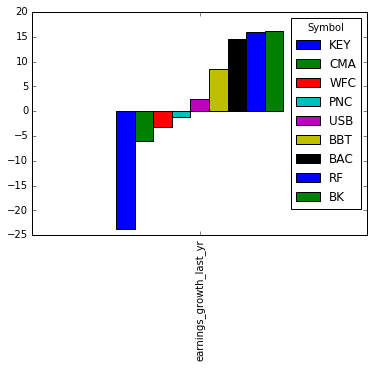

In [190]:
_df = df[df.industry == 'Major Banks'].sort_values('earnings_growth_last_yr')
_df[['earnings_growth_last_yr']].transpose().plot(kind='bar')

# What's the PE per sector?

In [197]:
df.groupby('sector').mean()['pe_ratio']

sector
--                         23.066667
Commercial Services        58.666667
Communications             22.550000
Consumer Durables          18.394118
Consumer Non-Durables      25.579412
Consumer Services          34.316667
Distribution Services      19.866667
Electronic Technology      22.783333
Energy Minerals           259.221429
Finance                    41.211458
Health Services            19.016667
Health Technology          38.068421
Industrial Services        75.166667
Non-Energy Minerals        42.140000
Process Industries         29.805556
Producer Manufacturing     49.703333
Retail Trade               25.056667
Technology Services        33.415385
Transportation             18.692857
Utilities                 238.772000
Name: pe_ratio, dtype: float64

In [204]:
df.groupby('sector').describe()['pe_ratio'].sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
sector,,,,,,,,
Energy Minerals,14.0,259.221429,557.963782,6.9,25.075,33.80,134.075,2087.0
Utilities,25.0,238.772000,1061.470563,14.2,19.300,21.20,25.100,5333.3
Industrial Services,9.0,75.166667,112.310017,20.6,29.300,34.10,49.300,372.6
Commercial Services,9.0,58.666667,72.007552,14.5,17.600,30.00,53.300,236.8
Producer Manufacturing,30.0,49.703333,130.501902,16.4,21.000,23.05,30.100,739.3
Non-Energy Minerals,5.0,42.140000,37.967394,15.6,16.900,30.50,40.100,107.6
Finance,96.0,41.211458,78.043653,7.3,14.475,19.30,33.650,505.8
Health Technology,38.0,38.068421,24.987295,9.1,25.275,34.35,42.975,157.5
Consumer Services,30.0,34.316667,38.602565,5.5,17.250,20.20,35.300,213.1


In [ ]:
df.

In [208]:
df[(df.pe_ratio > 500)]

,earnings_growth_next_5_yr,market_cap,earnings_growth_last_yr,price_book,industry,net_profit_margin,price_sales,pe_ratio,annual_revenue,todays_open,...,revenue_growth,previous_close,annual_profit,volume,earnings_growth_this_yr,dividend_yield,days_range,ytd_change_x,company_name,ytd_change_y
Symbol,,,,,,,,,,,,,,,,,,,,,
APA,-20.62,1.500000e+10,93.93,2.39,Oil & Gas Production,-25.56,4.48,658.0,5.400000e+09,39,...,-15.92,38.84,-1.400000e+09,2955868,112.68,2.53,38.62 - 39.70,-33.21,Apache Corp,-33.21
AES,9.00,7.300000e+09,-487.30,2.62,Electric Utilities,0.02,0.57,5333.3,1.350000e+10,11.08,...,-9.73,11.04,-1.100000e+09,2410622,7.36,4.32,11.07 - 11.18,-4.48,AES Corp,-4.48
CAT,15.00,6.990000e+10,-103.14,5.28,Trucks/Construction/Farm Machinery,-0.17,1.41,739.3,3.850000e+10,117.49,...,-18.03,117.49,-6.700000e+07,2992226,52.08,2.64,117.40 - 118.82,21.68,Caterpillar,21.68
AIG,11.00,5.480000e+10,-147.27,0.79,Multi-Line Insurance,-1.37,1.28,505.8,5.560000e+10,60.58,...,-4.75,60.48,-8.490000e+08,3747105,1369.73,2.11,60.44 - 61.03,-4.07,AIG,-4.07
EQT,17.50,1.090000e+10,-583.93,1.85,Oil & Gas Production,-25.14,6.06,2087.0,1.800000e+09,62.45,...,0.03,62.34,-4.530000e+08,1776219,471.26,0.19,61.36 - 62.80,-3.78,EQT Corp,-3.78


In [210]:
_df = df[df.pe_ratio < 500]
_df.groupby('sector').describe()['pe_ratio'].sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
sector,,,,,,,,
Industrial Services,9.0,75.166667,112.310017,20.6,29.300,34.10,49.300,372.6
Energy Minerals,12.0,73.675000,110.485697,6.9,23.025,29.95,60.725,398.3
Commercial Services,9.0,58.666667,72.007552,14.5,17.600,30.00,53.300,236.8
Non-Energy Minerals,5.0,42.140000,37.967394,15.6,16.900,30.50,40.100,107.6
Health Technology,38.0,38.068421,24.987295,9.1,25.275,34.35,42.975,157.5
Finance,95.0,36.321053,61.929316,7.3,14.450,19.20,33.300,490.5
Consumer Services,30.0,34.316667,38.602565,5.5,17.250,20.20,35.300,213.1
Technology Services,26.0,33.415385,13.989101,12.0,23.675,29.20,40.000,73.6
Process Industries,18.0,29.805556,12.844292,10.0,22.500,26.35,36.200,60.4
